# India Air Quality Dataset 

### Importing Libraries and Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_hour.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_day.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\city_day.csv")

In [21]:
data.shape

(1048488, 16)

In [22]:
station=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\stations.csv")

In [23]:
station.shape

(230, 5)

In [24]:
#df=data
df=pd.merge(data,station,on="StationId")
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,25-11-2017 00:00,68.0,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,0.20,5.55,0.05,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,25-11-2017 01:00,73.0,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,0.20,6.60,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,25-11-2017 02:00,81.0,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,0.23,6.77,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,25-11-2017 03:00,82.5,122.75,1.25,21.82,12.65,10.18,0.1,12.70,87.25,0.20,5.98,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,25-11-2017 04:00,77.5,112.50,0.50,23.50,12.90,8.90,0.1,11.58,76.45,0.20,6.02,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [25]:
df["City"]=df["City"].str.lower()

In [26]:
df.tail()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1048483,DL001,30-06-2020 19:00,40.5,130.75,NaN,8.60,4.33,36.58,0.55,8.67,13.68,NaN,NaN,NaN,102.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048484,DL001,30-06-2020 20:00,39.0,137.00,NaN,8.80,4.25,29.40,0.57,8.88,13.10,NaN,NaN,NaN,104.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048485,DL001,30-06-2020 21:00,42.5,152.25,NaN,10.12,4.95,28.02,0.57,9.80,11.50,NaN,NaN,NaN,105.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048486,DL001,30-06-2020 22:00,57.0,166.00,NaN,10.77,5.45,27.20,0.83,10.15,10.07,NaN,NaN,NaN,106.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048487,DL001,30-06-2020 23:00,81.0,181.75,NaN,15.30,7.95,32.55,0.78,10.68,7.72,NaN,NaN,NaN,107.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048488 entries, 0 to 1048487
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   StationId    1048488 non-null  object 
 1   Datetime     1048488 non-null  object 
 2   PM2.5        800121 non-null   float64
 3   PM10         705781 non-null   float64
 4   NO           817860 non-null   float64
 5   NO2          831375 non-null   float64
 6   NOx          855833 non-null   float64
 7   NH3          581748 non-null   float64
 8   CO           827450 non-null   float64
 9   SO2          664292 non-null   float64
 10  O3           798012 non-null   float64
 11  Benzene      701794 non-null   float64
 12  Toluene      672121 non-null   float64
 13  Xylene       213410 non-null   float64
 14  AQI          808992 non-null   float64
 15  AQI_Bucket   808992 non-null   object 
 16  StationName  1048488 non-null  object 
 17  City         1048488 non-null  object 
 18  St

In [28]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,800121.000000,705781.000000,817860.000000,831375.000000,855833.000000,581748.000000,827450.000000,664292.000000,798012.000000,701794.000000,672121.000000,213410.000000,808992.000000
mean,105.019131,201.526548,32.151775,43.682542,52.394115,35.917224,1.393692,14.910112,43.311444,3.276467,20.038358,2.232764,226.958824
std,101.431952,156.388572,60.177581,39.408620,68.463083,27.004742,2.116645,13.355241,61.673787,6.238386,37.994544,7.599092,133.207457
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,16.000000
25%,39.500000,89.810000,3.670000,18.150000,13.900000,19.270000,0.540000,6.620000,10.980000,0.240000,0.920000,0.000000,114.000000
50%,72.000000,159.150000,9.820000,31.890000,29.150000,30.730000,0.950000,11.600000,25.030000,1.550000,6.750000,0.230000,198.000000
75%,135.500000,268.390000,29.960000,56.560000,60.030000,45.980000,1.600000,18.780000,53.670000,4.150000,23.500000,1.630000,320.000000
max,1000.000000,1000.000000,500.000000,499.970000,500.000000,494.110000,50.000000,199.770000,997.000000,491.510000,499.800000,476.310000,1113.000000


In [29]:
df.shape

(1048488, 20)

In [30]:
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,25-11-2017 00:00,68.0,111.00,1.25,14.12,8.50,20.28,0.10,8.90,116.12,0.20,5.55,0.05,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
1,AP001,25-11-2017 01:00,73.0,102.00,0.30,14.30,7.90,11.50,0.30,11.80,121.50,0.20,6.60,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2,AP001,25-11-2017 02:00,81.0,123.00,0.80,24.85,13.88,10.28,0.10,11.62,83.80,0.23,6.77,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
3,AP001,25-11-2017 03:00,82.5,122.75,1.25,21.82,12.65,10.18,0.10,12.70,87.25,0.20,5.98,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
4,AP001,25-11-2017 04:00,77.5,112.50,0.50,23.50,12.90,8.90,0.10,11.58,76.45,0.20,6.02,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048483,DL001,30-06-2020 19:00,40.5,130.75,NaN,8.60,4.33,36.58,0.55,8.67,13.68,NaN,NaN,NaN,102.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048484,DL001,30-06-2020 20:00,39.0,137.00,NaN,8.80,4.25,29.40,0.57,8.88,13.10,NaN,NaN,NaN,104.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048485,DL001,30-06-2020 21:00,42.5,152.25,NaN,10.12,4.95,28.02,0.57,9.80,11.50,NaN,NaN,NaN,105.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active
1048486,DL001,30-06-2020 22:00,57.0,166.00,NaN,10.77,5.45,27.20,0.83,10.15,10.07,NaN,NaN,NaN,106.0,Moderate,"Alipur, Delhi - DPCC",delhi,Delhi,Active


In [31]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          248367
PM10           342707
NO             230628
NO2            217113
NOx            192655
NH3            466740
CO             221038
SO2            384196
O3             250476
Benzene        346694
Toluene        376367
Xylene         835078
AQI            239496
AQI_Bucket     239496
StationName         0
City                0
State               0
Status              0
dtype: int64

<Axes: >

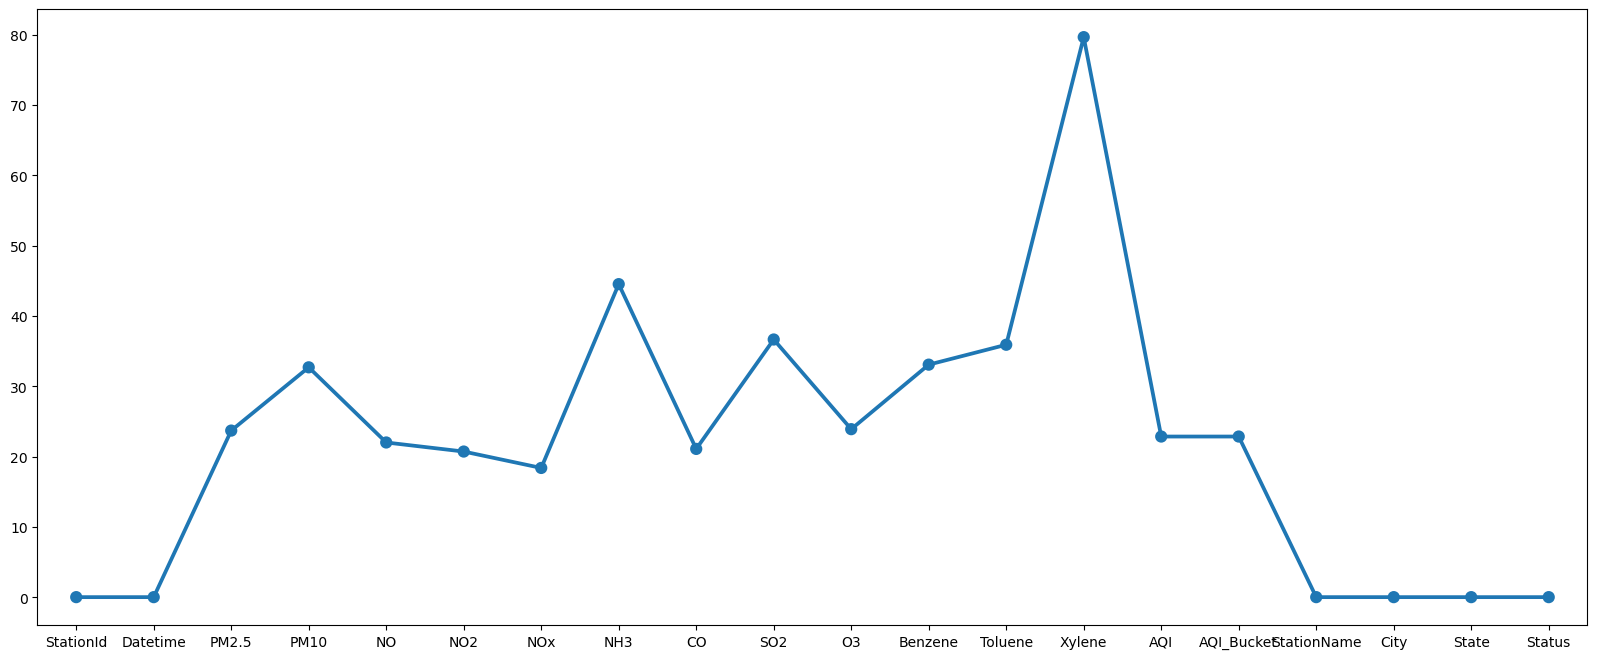

In [32]:
l1=[]
for i in df:
    l1.append(((df[str(i)].isnull().sum())/df.shape[0])*100)
l2=df.columns
plt.figure(figsize=(20,8))
sns.pointplot(x=l2,y=l1)

In [33]:
null_value_percent=pd.DataFrame(l1,index=l2)
null_value_percent

,0
StationId,0.000000
Datetime,0.000000
PM2.5,23.688111
PM10,32.685829
NO,21.996246
NO2,20.707247
NOx,18.374555
NH3,44.515531
CO,21.081596
SO2,36.642861


In [34]:
df.drop(["Benzene","Toluene","Xylene"],axis=1,inplace=True)

In [35]:
df["StationId"].nunique()

42

In [36]:
# Station id wise empty
df_n=df.select_dtypes(exclude="object")
df_n["StationId"]=df["StationId"]
col=list(df_n.columns)
col.pop()
l5=[]
for i in col:
    l5.append(df.groupby(["StationId"])[i].mean().isnull().sum())
print(pd.DataFrame(l5,index=col))

        0
PM2.5   1
PM10    4
NO      0
NO2     0
NOx     1
NH3    10
CO      1
SO2     8
O3      1
AQI     1


In [37]:
df["City"].value_counts()

delhi            907412
patna             63998
visakhapatnam     35040
amaravati         22776
guwahati          12000
chandigarh         7262
Name: City, dtype: int64

In [38]:
# City wise empty
df_n=df.select_dtypes(exclude=['object'])
df_n["City"]=df["City"]
col = list(df_n.columns)
col.pop()
l3=[]
for i in col:
    l3.append((df.groupby(["City"])[str(i)].mean().isnull().sum()))

null_val=pd.DataFrame(l3,index=col)
print(null_val)

       0
PM2.5  0
PM10   0
NO     0
NO2    0
NOx    0
NH3    0
CO     0
SO2    0
O3     0
AQI    0


In [39]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          248367
PM10           342707
NO             230628
NO2            217113
NOx            192655
NH3            466740
CO             221038
SO2            384196
O3             250476
AQI            239496
AQI_Bucket     239496
StationName         0
City                0
State               0
Status              0
dtype: int64

In [40]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,25-11-2017 00:00,68.0,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
1,AP001,25-11-2017 01:00,73.0,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2,AP001,25-11-2017 02:00,81.0,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
3,AP001,25-11-2017 03:00,82.5,122.75,1.25,21.82,12.65,10.18,0.1,12.70,87.25,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
4,AP001,25-11-2017 04:00,77.5,112.50,0.50,23.50,12.90,8.90,0.1,11.58,76.45,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [41]:
df["Date"]=pd.to_datetime(data["Datetime"])
#df["Date"]=pd.to_datetime(data["Date"])

In [42]:
df.index = df["Date"]
df.drop(["Date"],axis=1,inplace=True)

In [43]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
Date,,,,,,,,,,,,,,,,,
2017-11-25 00:00:00,AP001,25-11-2017 00:00,68.0,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2017-11-25 01:00:00,AP001,25-11-2017 01:00,73.0,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2017-11-25 02:00:00,AP001,25-11-2017 02:00,81.0,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2017-11-25 03:00:00,AP001,25-11-2017 03:00,82.5,122.75,1.25,21.82,12.65,10.18,0.1,12.70,87.25,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2017-11-25 04:00:00,AP001,25-11-2017 04:00,77.5,112.50,0.50,23.50,12.90,8.90,0.1,11.58,76.45,NaN,NaN,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [44]:
df.shape

(1048488, 17)

In [45]:
df["City"].nunique()

6

In [47]:
grouped_df=df.groupby('StationId')
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))
df_filled

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2017-11-25 00:00:00,68.0,111.00,1.250000,14.12,8.50,20.28,0.10,8.90,116.12,95.602137
2017-11-25 01:00:00,73.0,102.00,0.300000,14.30,7.90,11.50,0.30,11.80,121.50,95.602137
2017-11-25 02:00:00,81.0,123.00,0.800000,24.85,13.88,10.28,0.10,11.62,83.80,95.602137
2017-11-25 03:00:00,82.5,122.75,1.250000,21.82,12.65,10.18,0.10,12.70,87.25,95.602137
2017-11-25 04:00:00,77.5,112.50,0.500000,23.50,12.90,8.90,0.10,11.58,76.45,95.602137
...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:00:00,40.5,130.75,12.593369,8.60,4.33,36.58,0.55,8.67,13.68,102.000000
2020-06-30 23:00:00,39.0,137.00,12.593369,8.80,4.25,29.40,0.57,8.88,13.10,104.000000
2020-06-30 23:00:00,42.5,152.25,12.593369,10.12,4.95,28.02,0.57,9.80,11.50,105.000000


In [48]:
df_filled.isnull().sum()

PM2.5     37235
PM10     178161
NO            0
NO2           0
NOx       37235
NH3      322314
CO        37235
SO2      196880
O3        48191
AQI       37235
dtype: int64

In [49]:
groupedcity_df=df.groupby("City")

In [50]:
df_filled=groupedcity_df.transform(lambda x:x.fillna(x.mean()))

In [51]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

for i in num_col:
    pm_mean=df_filled[i].mean()
    df_filled[i]=df_filled[i].fillna(pm_mean)

In [52]:
df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

In [53]:
df_filled.shape

(1048488, 10)

In [54]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [55]:
def outlier_removal(data,k=1):
    mean_value=data.mean()
    data=data.to_list()
    
    q3=np.percentile(data,75)
    q1=np.percentile(data,25)

    iqr=q3-q1

    lower_range=q1-(iqr*1.5)
    higher_range=q3+(iqr*1.5)
    
    
    for i,j in enumerate(data):
        if (j<=lower_range or j>=higher_range):
            data[i]=mean_value
    return data

In [56]:
for j in range(0,4):
    for i in num_col:
        df_filled[i]=outlier_removal(df_filled[i])

In [57]:
num_col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

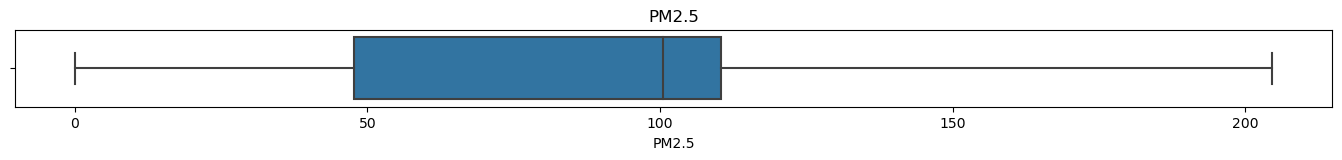

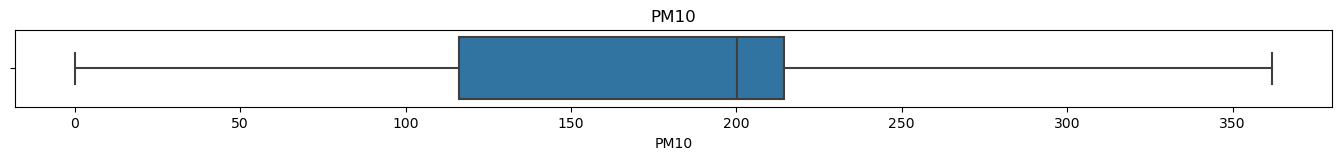

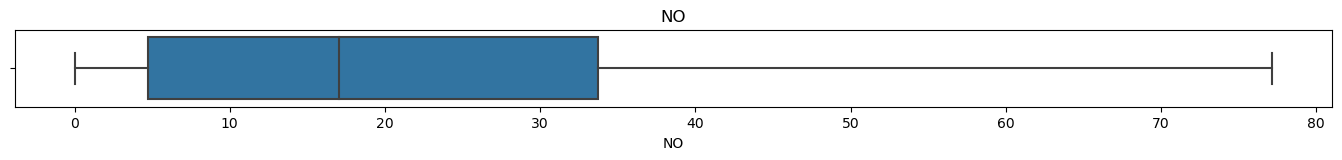

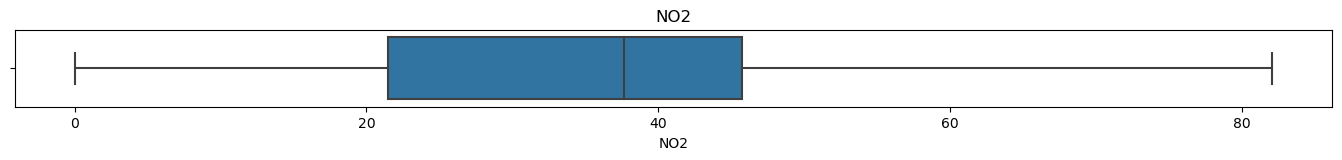

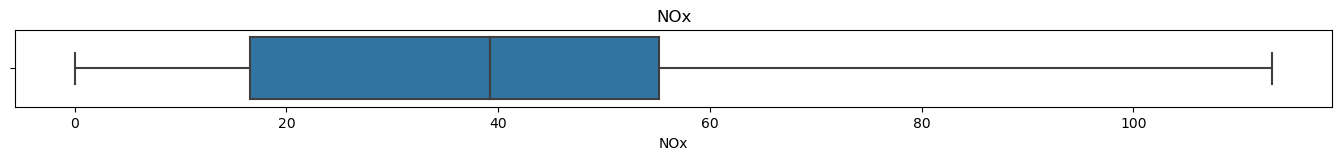

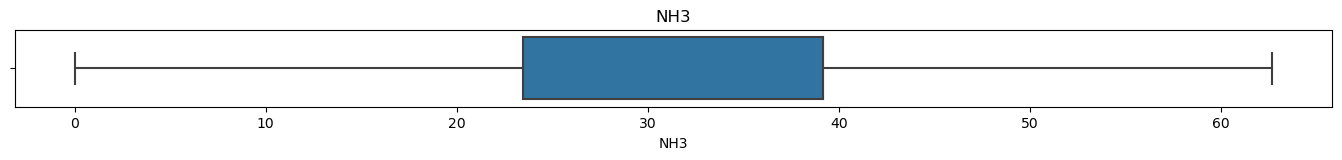

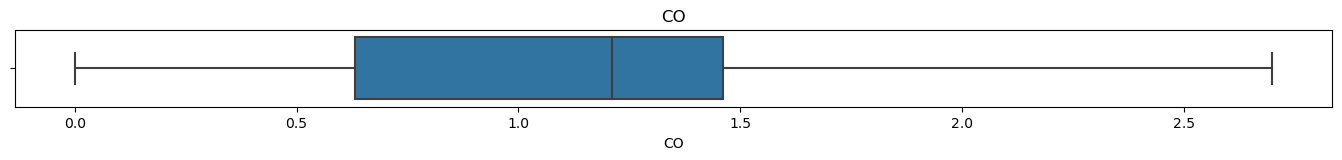

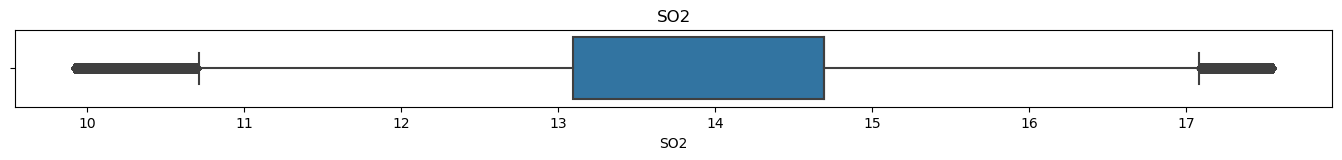

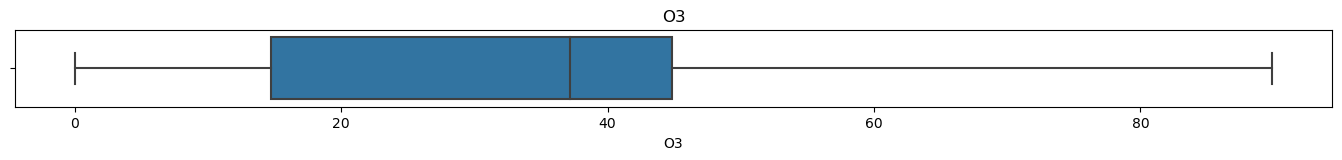

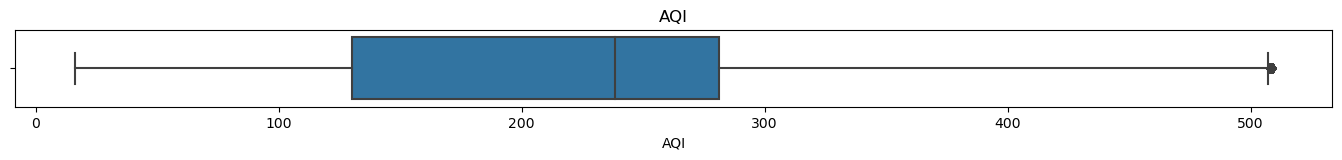

In [58]:
#Printing boxplot for each numerical column present in the data set
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_filled, x=i)
    plt.title(i)
plt.show()

In [59]:
df_filled["city"]=df["City"]
cities=list(df_filled["city"].unique())
cities

['amaravati', 'visakhapatnam', 'guwahati', 'patna', 'chandigarh', 'delhi']

In [60]:
df_filled

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,city
Date,,,,,,,,,,,
2017-11-25 00:00:00,68.0,111.00,1.250000,14.12,8.50,20.28,0.10,13.626803,43.434261,95.602137,amaravati
2017-11-25 01:00:00,73.0,102.00,0.300000,14.30,7.90,11.50,0.30,11.800000,43.434261,95.602137,amaravati
2017-11-25 02:00:00,81.0,123.00,0.800000,24.85,13.88,10.28,0.10,11.620000,83.800000,95.602137,amaravati
2017-11-25 03:00:00,82.5,122.75,1.250000,21.82,12.65,10.18,0.10,12.700000,87.250000,95.602137,amaravati
2017-11-25 04:00:00,77.5,112.50,0.500000,23.50,12.90,8.90,0.10,11.580000,76.450000,95.602137,amaravati
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:00:00,40.5,130.75,33.722763,8.60,4.33,36.58,0.55,13.626803,13.680000,102.000000,delhi
2020-06-30 23:00:00,39.0,137.00,33.722763,8.80,4.25,29.40,0.57,13.626803,13.100000,104.000000,delhi
2020-06-30 23:00:00,42.5,152.25,33.722763,10.12,4.95,28.02,0.57,13.626803,11.500000,105.000000,delhi


In [61]:
df_filled.shape
df_filled["city"]=df["City"]

In [62]:
df_filled["city"]=df["City"].str.lower()

In [63]:
dist=input("Give the district name or number to predict Air Quality in above given districts")

def city(dist):
    if (int(dist)==1) or (str(dist).lower()=="delhi"):
        city_name="delhi"
        return city_name
    elif (int(dist)==2) or (str(dist).lower()=="amaravati"):
        city_name ="amaravati"
        return city_name
    elif (int(dist)==3) or (str(dist).lower()=="guwahati"):
        city_name="guwahati"
        return city_name
    elif (int(dist)==4) or (str(dist).lower()=="patna"):
        city_name="patna"
        return city_name
    elif (int(dist)==5 or (str(dist).lower()=="chandigarh")):
        city_name="chandigarh"
        return city_name
    elif (int(dist)==6) or (str(dist).lower()=="visakhapatnam"):
        city_name="visakhapatnam"
        return city_name
    else:
        print("Specify right index")
        
city_name=city(dist)

Give the district name or number to predict Air Quality in above given districts1


## City name

In [85]:
city_name="delhi"

In [86]:
groupedcity_df=df_filled.groupby("city")

In [87]:
delhi=groupedcity_df.get_group((city_name.lower()))
delhi.drop(["city"],axis=1,inplace=True)

In [88]:
delhi.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2015-01-01 01:00:00,105.362566,200.218244,69.030000,35.69,104.720000,39.170971,0.58,14.690247,43.434261,238.548453
2015-01-01 01:00:00,105.362566,214.548929,32.271971,35.58,52.609511,39.170971,0.55,14.690247,43.434261,238.548453
2015-01-01 01:00:00,105.362566,214.548929,32.271971,35.45,52.609511,39.170971,0.51,14.690247,44.809586,238.548453
2015-01-01 01:00:00,105.362566,214.548929,32.271971,35.51,52.609511,39.170971,0.53,14.690247,44.809586,238.548453
2015-01-01 02:00:00,105.362566,200.218244,70.910000,35.82,106.740000,39.170971,0.58,14.690247,44.809586,238.548453


In [89]:
delhi.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [90]:
delhi.shape

(907412, 10)

In [91]:
delhi = delhi.resample('D').mean()

In [92]:
delhi.shape

(2167, 10)

In [93]:
delhi.isnull().sum()

PM2.5    159
PM10     159
NO       159
NO2      159
NOx      159
NH3      159
CO       159
SO2      159
O3       159
AQI      159
dtype: int64

In [94]:
end_date="2020-01-06"
selected_data = delhi[delhi.index <= end_date]
selected_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2015-01-01,94.632225,168.746662,22.594847,40.855109,62.951941,39.170971,1.234239,14.690247,49.349117,250.487987
2015-01-02,110.451391,214.548929,33.722763,45.707079,55.176412,39.170971,1.460934,14.690247,44.809586,238.548453
2015-01-03,118.387605,185.221333,10.568583,7.663583,18.244000,39.170971,1.313750,14.690247,24.175988,289.308333
2015-01-04,110.451391,214.548929,33.722763,45.707079,55.176412,39.170971,1.460934,14.690247,44.809586,238.548453
2015-01-05,110.451391,214.548929,33.722763,45.707079,55.176412,39.170971,1.460934,14.690247,44.809586,238.548453
...,...,...,...,...,...,...,...,...,...,...
2020-01-02,79.624133,213.511109,8.294836,24.454861,38.963320,21.245419,1.050834,13.853375,26.399728,232.464689
2020-01-03,75.360328,157.606872,14.530517,29.090816,40.341391,36.932320,1.048478,13.416380,36.394557,198.115278
2020-01-04,38.959269,148.757370,8.847578,24.868977,20.571781,33.101697,0.955636,13.858733,16.214100,138.102242


In [82]:
for i in num_col:
  delhi[i] = delhi[i].fillna(method='ffill')

In [95]:
delhi=selected_data

In [96]:
delhi.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [97]:
delhi.shape

(1832, 10)

### implementing VAR Model for Delhi Data

In [124]:
# Augmented Dickey Fuller Test
import statsmodels.api
from statsmodels.graphics.tsaplots import plot_acf

In [125]:
# Stability Test
def stability_test(series):
    result=statsmodels.tsa.stattools.adfuller(series,autolag="AIC")
    print(result)
    if result[1]>=0.5:
        print("data is not stationary")
    else:
        print("procede VAR data is Stationary")

In [450]:
for i in num_col:
    print(f"{i}")
    stability_test(delhi[i])

PM2.5
(-3.623883273356957, 0.00532050803103156, 25, 1807, {'1%': -3.4339740253219566, '5%': -2.863140805408186, '10%': -2.5676222161097058}, 15038.193504379335)
procede VAR data is Stationary
PM10
(-5.130215754687452, 1.2184766753128096e-05, 18, 1814, {'1%': -3.4339600207952796, '5%': -2.863134623063046, '10%': -2.5676189242070433}, 16872.938693076547)
procede VAR data is Stationary
NO
(-2.7482590416593435, 0.0660531069149703, 19, 1813, {'1%': -3.433962014811523, '5%': -2.86313550332995, '10%': -2.5676193929209554}, 9995.442343298035)
procede VAR data is Stationary
NO2
(-3.688118397410618, 0.004283417644741858, 22, 1810, {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}, 10074.204178872378)
procede VAR data is Stationary
NOx
(-3.7426525063993776, 0.0035516756301826494, 22, 1810, {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}, 12329.210954126447)
procede VAR data is Stationary
NH3
(-3.551372825379247, 0.006761691364502857,

In [126]:
# train test data split
tests=7
test=delhi[-tests:]
train=delhi[tests:]

In [127]:
test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2019-12-31,86.362432,200.385523,16.292285,30.367133,44.438784,39.304106,0.731753,13.563999,31.438421,221.263097
2020-01-01,85.600756,193.619700,12.113526,30.459187,43.324201,33.331455,0.611414,13.654170,39.143838,210.735276
2020-01-02,79.624133,213.511109,8.294836,24.454861,38.963320,21.245419,1.050834,13.853375,26.399728,232.464689
2020-01-03,75.360328,157.606872,14.530517,29.090816,40.341391,36.932320,1.048478,13.416380,36.394557,198.115278
2020-01-04,38.959269,148.757370,8.847578,24.868977,20.571781,33.101697,0.955636,13.858733,16.214100,138.102242
2020-01-05,87.637989,188.975065,34.334792,53.513087,61.412751,35.673176,1.276581,13.549000,20.848798,205.058333
2020-01-06,56.416985,119.682187,5.265285,53.386625,43.044489,29.115073,1.444086,13.074317,34.167631,134.999688


In [128]:
model=statsmodels.tsa.vector_ar.var_model.VAR(train)

In [129]:
results=model.fit(7)

In [130]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Jul, 2023
Time:                     22:23:59
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    37.4285
Nobs:                     1818.00    HQIC:                   36.0717
Log likelihood:          -57154.4    FPE:                2.09599e+15
AIC:                      35.2784    Det(Omega_mle):     1.42892e+15
--------------------------------------------------------------------
Results for equation PM2.5
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           84.184536        24.576708            3.425           0.001
L1.PM2.5         0.416909         0.053623            7.775           0.000
L1.PM10          0.015305         0.023422            0.653           0.513
L1.N

In [131]:
lagged_Values = train.values[-7:]

In [132]:
pred=results.forecast(y=lagged_Values,steps=7)

In [150]:
residuals = results.resid
residuals

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2015-01-15,16.601059,-2.807624,-9.785333,-14.386358,-6.723349,-2.468678,0.573160,-0.099383,11.580068,24.932050
2015-01-16,-32.357899,-60.343249,-8.304657,-12.356235,-10.154183,0.467706,-0.121619,0.228022,-2.289546,-103.685617
2015-01-17,23.112392,9.059414,-2.343677,-6.527426,-5.529367,1.120285,0.284052,0.261868,3.426537,42.921407
2015-01-18,11.292046,0.872234,-7.826106,-11.244652,-11.294219,0.018204,0.273496,0.185866,14.289046,35.951757
2015-01-19,-17.308234,-38.748391,-5.894172,-13.748010,-6.818919,-0.107094,0.082361,0.022886,-10.993059,-54.965251
...,...,...,...,...,...,...,...,...,...,...
2020-01-02,-14.588328,17.530746,-7.359180,-10.266342,-3.077190,-10.869899,0.350232,0.166638,-8.896508,4.553905
2020-01-03,-6.266159,-49.749480,1.143428,-4.148572,-1.707569,7.828732,0.031462,-0.353331,3.553153,-16.511051
2020-01-04,-47.221023,-32.332806,-5.918936,-4.249418,-13.227067,-3.323375,-0.076787,-0.026258,-18.906644,-94.860340


In [133]:
predicted=pd.DataFrame(pred,columns=num_col)
predicted.index=test.index
predicted

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2019-12-31,73.942342,168.804885,14.703350,42.013653,39.765146,36.127205,1.230138,13.363055,36.061598,182.844048
2020-01-01,93.323093,178.967995,14.271960,41.592666,44.151262,34.281200,1.439185,13.480768,29.579571,266.147593
2020-01-02,83.467183,180.980717,16.752152,42.218482,43.160518,36.287747,1.217691,13.746523,31.788568,249.761871
2020-01-03,87.805204,170.323123,18.959698,39.938459,42.217209,34.432049,1.146887,13.716650,27.696715,236.361973
2020-01-04,93.945259,188.927453,15.805284,39.524686,37.029886,33.418897,1.134871,13.679601,30.213444,242.021620
2020-01-05,85.728843,180.787286,16.032411,39.866155,37.975752,31.332635,1.147826,13.546452,30.638225,219.038012
2020-01-06,91.083940,185.684185,17.771384,38.362412,37.966124,31.263199,1.131192,13.741038,33.367195,235.027368


In [134]:
test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2019-12-31,86.362432,200.385523,16.292285,30.367133,44.438784,39.304106,0.731753,13.563999,31.438421,221.263097
2020-01-01,85.600756,193.619700,12.113526,30.459187,43.324201,33.331455,0.611414,13.654170,39.143838,210.735276
2020-01-02,79.624133,213.511109,8.294836,24.454861,38.963320,21.245419,1.050834,13.853375,26.399728,232.464689
2020-01-03,75.360328,157.606872,14.530517,29.090816,40.341391,36.932320,1.048478,13.416380,36.394557,198.115278
2020-01-04,38.959269,148.757370,8.847578,24.868977,20.571781,33.101697,0.955636,13.858733,16.214100,138.102242
2020-01-05,87.637989,188.975065,34.334792,53.513087,61.412751,35.673176,1.276581,13.549000,20.848798,205.058333
2020-01-06,56.416985,119.682187,5.265285,53.386625,43.044489,29.115073,1.444086,13.074317,34.167631,134.999688


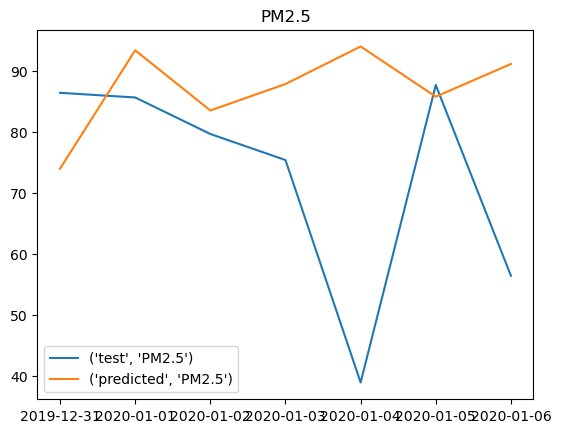

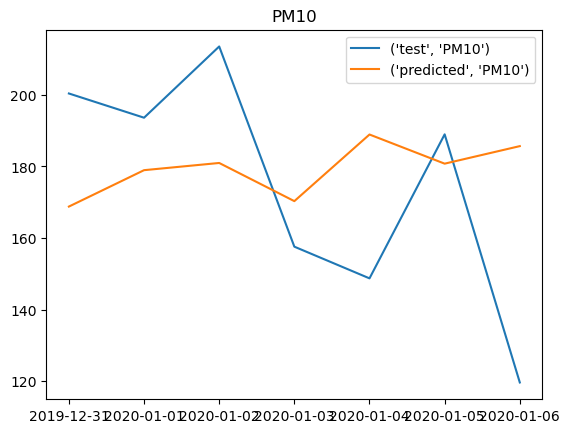

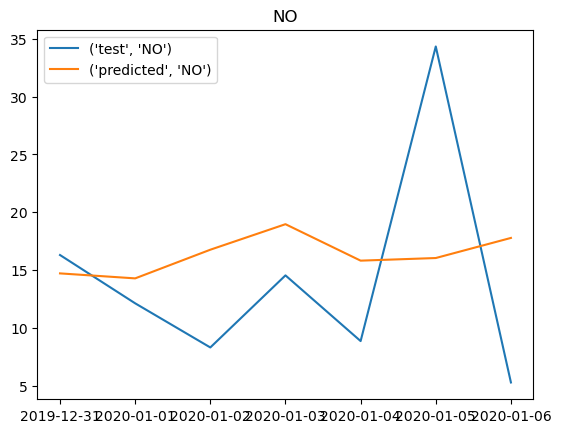

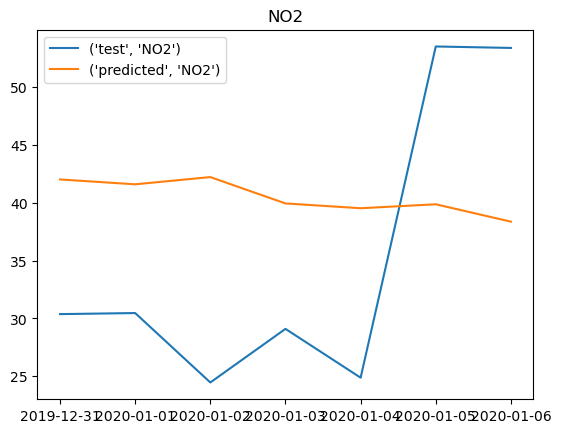

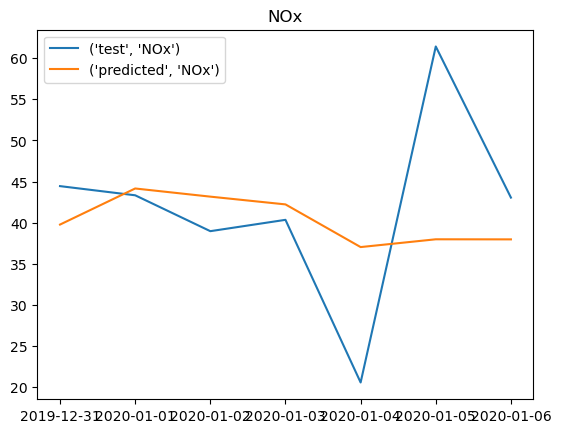

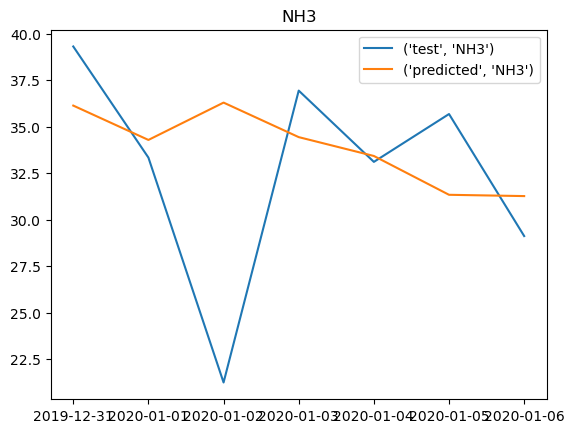

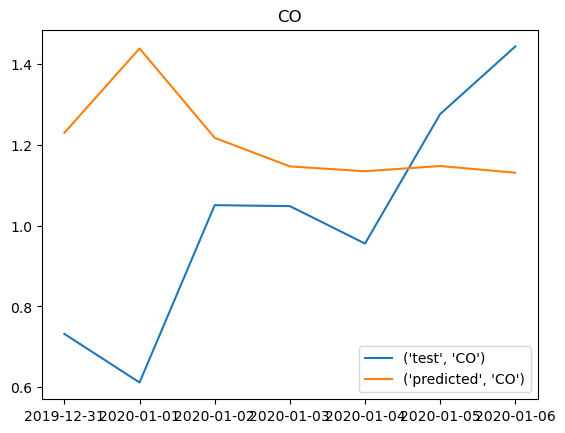

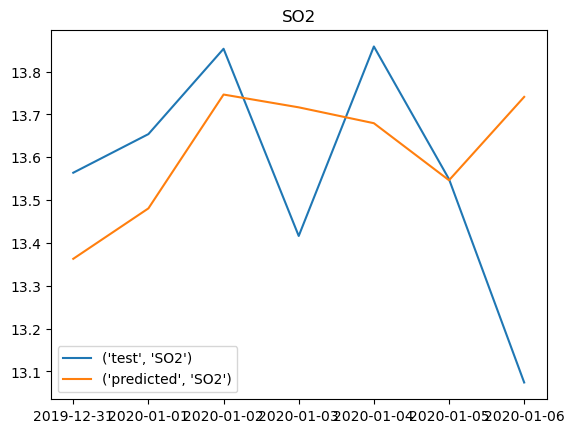

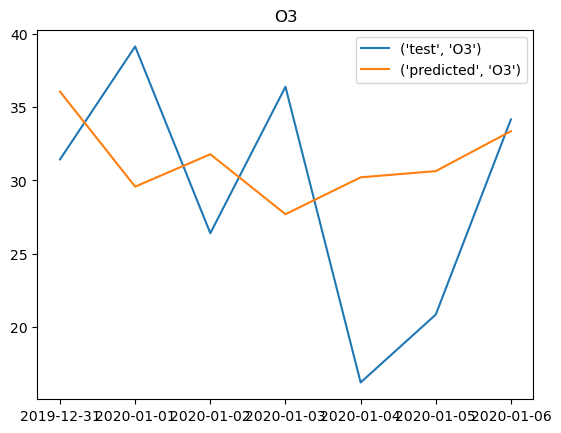

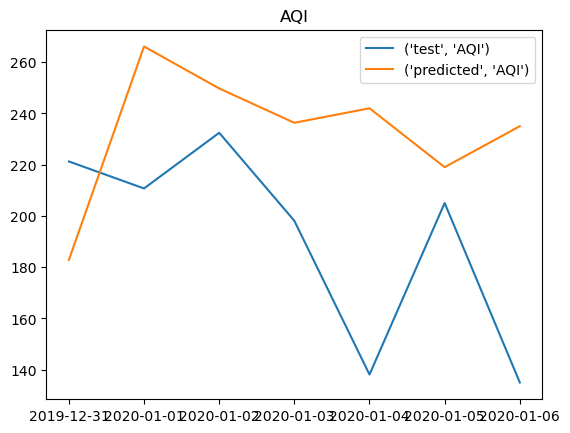

In [135]:
for i in num_col:
    plt.plot(test[i],label=("test", i))
    plt.plot(predicted[i],label=("predicted", i))
    plt.title(i)
    plt.legend()
    plt.show()

In [136]:
def mape(test,pred):
    m=np.abs((pred-test)/test)*100
    m=m[1].mean()
    return m

In [137]:
num_col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [138]:
l1=[]
l2=[]
for i in num_col:
    m=mape(predicted[i],test[i])
    l1.append(i)
    l2.append(m)
ovrl_mape=pd.DataFrame({"index":l1,
                        "mape":l2})
ovrl_mape=pd.DataFrame(ovrl_mape)
print(ovrl_mape)
overall_mean=ovrl_mape["mape"].mean()
print(f"\n\nOverall average in VAR Model:{overall_mean}")

   index       mape
0  PM2.5   8.274841
1   PM10   8.186774
2     NO  15.123599
3    NO2  26.767890
4    NOx   1.873243
5    NH3   2.770456
6     CO  57.516688
7    SO2   1.286288
8     O3  32.334026
9    AQI  20.820146


Overall average in VAR Model:17.495395014728835


### ARIMA Model

In [139]:
from statsmodels.tsa.arima.model import ARIMA

In [140]:
arima_pred=pd.DataFrame()
for i in num_col:
    model=ARIMA(train[i],order=(1,0,0))
    res=model.fit()
    #print(res.summary())
    
    #Prediction in Dataframe
    arima_pred[i]=res.predict(start="2019-12-31",end="2020-01-06")    

In [141]:
arima_pred.shape

(7, 10)

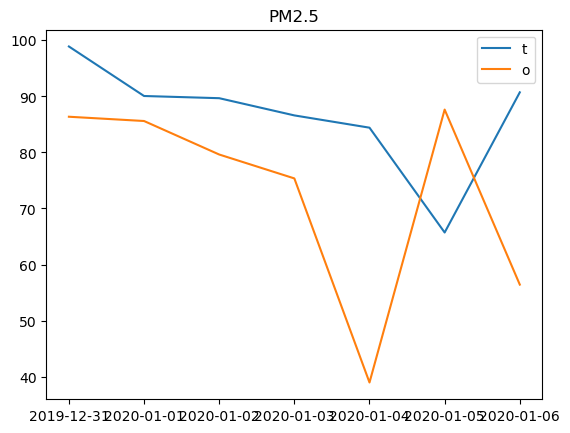

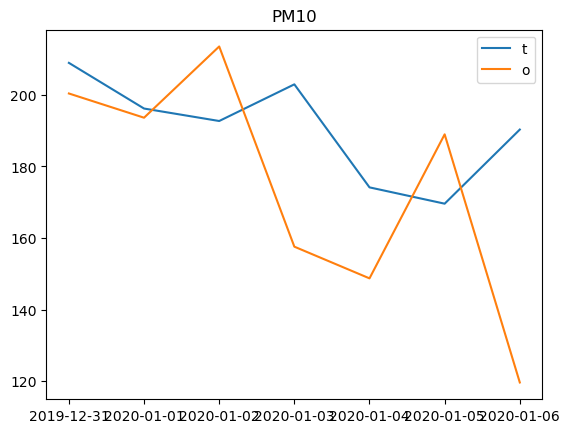

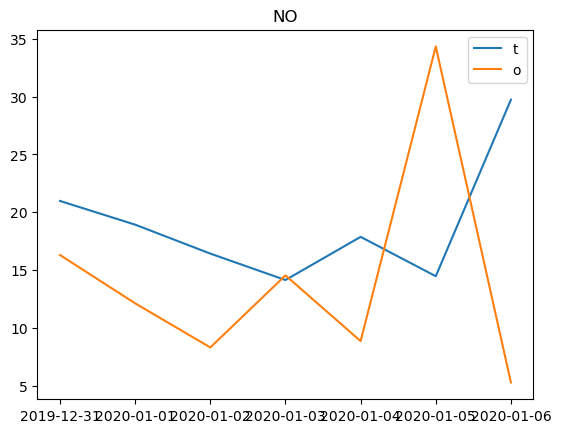

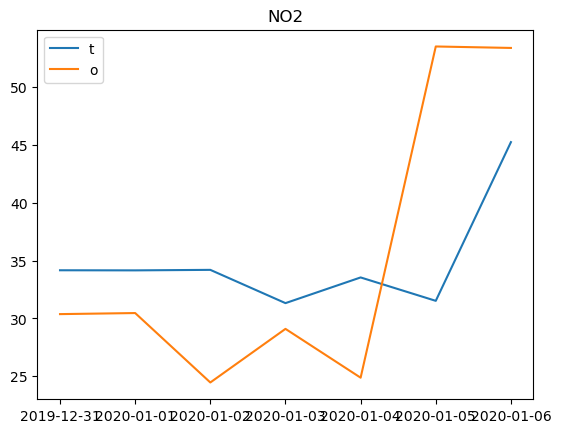

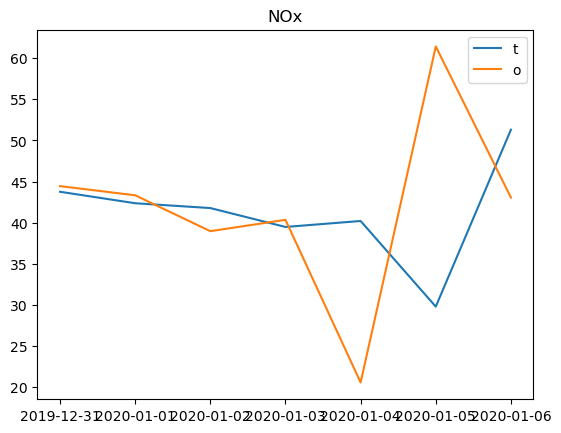

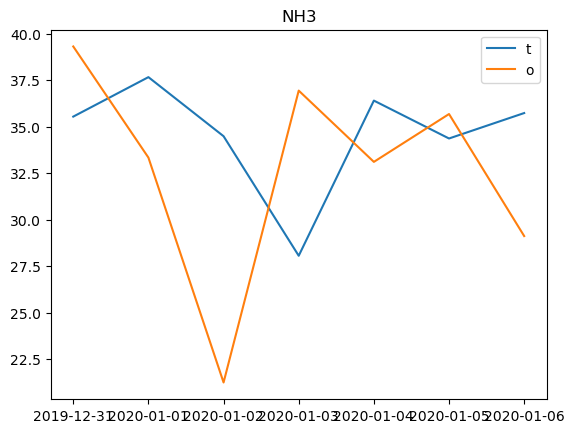

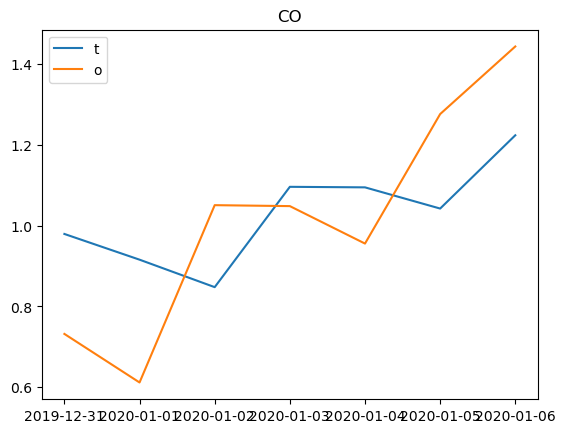

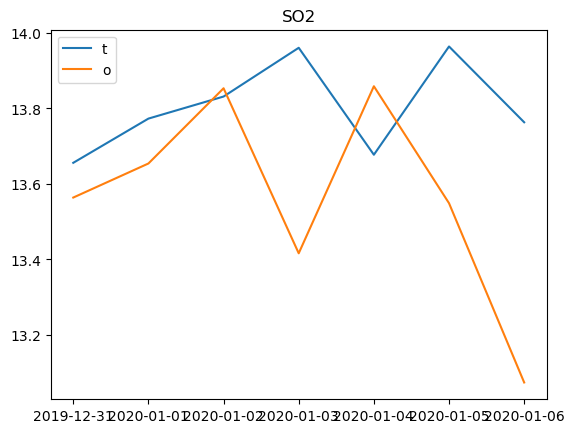

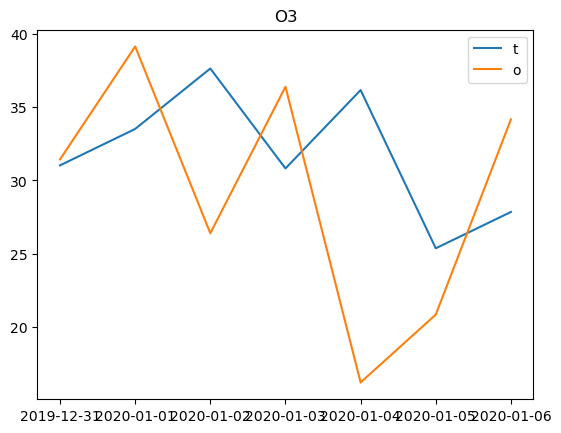

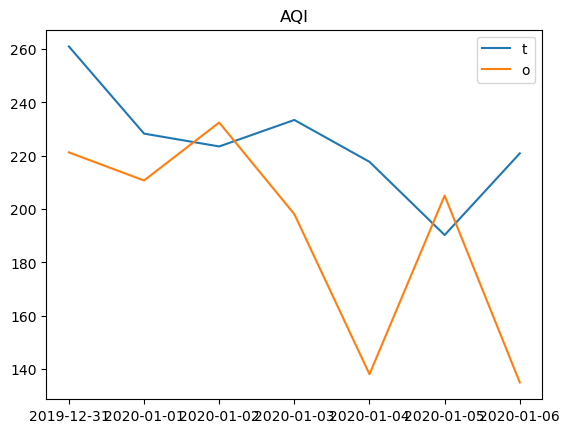

In [142]:
for i in num_col:
    plt.plot(arima_pred[i],label="predicted")
    plt.plot(test[i],label="test")
    plt.title(i)
    plt.legend("topright")
    plt.show()

In [143]:
arima_mape=[]
for i in num_col:
    ar_m=mape(arima_pred[i],test[i])
    arima_mape.append(ar_m)
    
arima_mape_df=pd.DataFrame({"index":num_col,
               "arima_mape":arima_mape})

print(arima_mape_df)


   index  arima_mape
0  PM2.5    4.953199
1   PM10    1.305678
2     NO   35.972096
3    NO2   10.808055
4    NOx    2.280121
5    NH3   11.485174
6     CO   33.233065
7    SO2    0.863199
8     O3   16.787707
9    AQI    7.696287


In [144]:
print(f"\nOverall average Mean Average Percentage Error in ARIMA Model: {arima_mape_df.arima_mape.mean()}\n")


Overall average Mean Average Percentage Error in ARIMA Model: 12.538458203644046



## Results

In [145]:
print(arima_mape_df)

   index  arima_mape
0  PM2.5    4.953199
1   PM10    1.305678
2     NO   35.972096
3    NO2   10.808055
4    NOx    2.280121
5    NH3   11.485174
6     CO   33.233065
7    SO2    0.863199
8     O3   16.787707
9    AQI    7.696287


In [146]:
print(f"\nARIMA Model\nOverall Mean Average Percentage Error : {arima_mape_df.arima_mape.mean()}\n")


ARIMA Model
Overall Mean Average Percentage Error : 12.538458203644046



In [147]:
print(ovrl_mape)

   index       mape
0  PM2.5   8.274841
1   PM10   8.186774
2     NO  15.123599
3    NO2  26.767890
4    NOx   1.873243
5    NH3   2.770456
6     CO  57.516688
7    SO2   1.286288
8     O3  32.334026
9    AQI  20.820146


In [148]:
print(f"\nVAR Model\nOverall Mean Abs Percentage Error:{overall_mean}")


VAR Model
Overall Mean Abs Percentage Error:17.495395014728835


In [123]:
## LSTM Model

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Assuming 'residuals' contains the residuals obtained from the VAR model
# Reshape the residuals to a 2D array (samples, features)
residuals_reshaped = residuals.reshape(-1, 1)

# Normalize the residuals to have zero mean and unit variance
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_normalized = scaler.fit_transform(residuals_reshaped)

# Define the window size for creating input-output sequences
window_size = 10  # You can adjust this value based on your dataset

# Create input-output sequences from the residuals data
X = []
y = []
for i in range(len(residuals_normalized) - window_size):
    X.append(residuals_normalized[i : i + window_size])
    y.append(residuals_normalized[i + window_size])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(window_size, 1)))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the LSTM model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

# Make predictions using the LSTM model
y_pred = model.predict(X_test)

# Inverse transform the predictions and true residuals to get the actual scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate evaluation metrics on the original scale (if needed)
# e.g., MSE, RMSE, MAE, etc.


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [234]:
start_date="2019-12-07"
end_date="2020-12-06"

In [237]:
start_date="2019-12-07"
end_date="2020-12-06"
selected_data = amaravati[(amaravati.index >= start_date) & (amaravati.index <= end_date)]

In [238]:
selected_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2019-12-07 00:00:00,39.401658,157.299965,9.107097,33.714839,25.346129,40.007510,0.808065,13.888172,36.807091,147.903226
2019-12-07 01:00:00,63.309812,205.187146,9.729622,42.117438,32.507717,42.440700,1.236189,13.806980,34.617435,166.032258
2019-12-07 02:00:00,58.463038,178.577316,8.378744,33.526720,25.100505,45.297867,1.119768,13.592945,39.253186,158.258065
2019-12-07 03:00:00,48.733871,142.693548,5.285484,29.058387,19.762581,41.054516,0.981290,13.438619,43.318101,143.645161
2019-12-07 04:00:00,39.225806,159.039298,6.737097,34.086753,26.013548,31.374194,1.009355,13.472834,49.865431,147.354839
...,...,...,...,...,...,...,...,...,...,...
2020-12-05 20:00:00,121.516667,212.650000,42.163253,58.554292,69.624471,36.600857,1.342716,13.705409,19.901000,271.200000
2020-12-05 21:00:00,139.412086,241.800000,38.636046,55.341934,65.240690,40.819730,1.717433,14.480002,16.444667,317.800000
2020-12-05 22:00:00,152.290838,251.891667,29.990849,46.982868,54.825373,41.575514,1.300064,13.995172,17.552568,323.200000


In [240]:
def prepare_data(arry,n_features):
    x,y=[],[]
    for i in range(len(arry)):
        end=i+n_features
        if end>len(arry)-1:
            break
        seq_x,seq_y= arry[i:end],arry[end]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

In [241]:
temp=selected_data["PM2.5"]
n_features=24
n_steps=24
x,y= prepare_data(temp,n_features)

In [242]:
n_steps=24

In [243]:
print(x,y)

[[ 39.40165778  63.30981204  58.46303785 ... 108.70891785 108.2044845
  119.11412782]
 [ 63.30981204  58.46303785  48.73387097 ... 108.2044845  119.11412782
   93.19679369]
 [ 58.46303785  48.73387097  39.22580645 ... 119.11412782  93.19679369
   94.73421304]
 ...
 [ 12.425        9.09004637 121.30185215 ... 108.41666667 121.51666667
  139.41208554]
 [  9.09004637 121.30185215 115.56666667 ... 121.51666667 139.41208554
  152.29083774]
 [121.30185215 115.56666667 127.91793208 ... 139.41208554 152.29083774
  123.68625661]] [ 93.19679369  94.73421304 100.39628315 ... 152.29083774 123.68625661
 119.65379624]


In [244]:
x[-1]

array([121.30185215, 115.56666667, 127.91793208, 122.81003523,
       127.24044529, 124.96208554, 124.81208554, 132.20667547,
       125.34541887, 134.80209434, 139.32543648, 152.10794089,
        98.92626541, 103.1       , 127.52626541, 122.51544529,
       110.48333333,  94.2       , 114.65      , 108.41666667,
       121.51666667, 139.41208554, 152.29083774, 123.68625661])

In [245]:
y.shape

(8737,)

In [246]:
n_feature=1
x=x.reshape((x.shape[0],x.shape[1],n_feature))

In [247]:
x.shape

(8737, 24, 1)

## Building LSTM Model

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [249]:
model = Sequential()
model.add(LSTM(50, activation="relu",return_sequences=True,input_shape=(n_steps,n_feature)))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

model.fit(x,y,epochs=50,verbose=1) 

Epoch 1/50
274/274 [==============================] - 11s 26ms/step - loss: 1331.4380
Epoch 2/50
274/274 [==============================] - 7s 24ms/step - loss: 378.5638
Epoch 3/50
274/274 [==============================] - 7s 24ms/step - loss: 306.2747
Epoch 4/50
274/274 [==============================] - 7s 26ms/step - loss: 268.2353
Epoch 5/50
274/274 [==============================] - 7s 27ms/step - loss: 278.6701
Epoch 6/50
274/274 [==============================] - 7s 27ms/step - loss: 252.4280
Epoch 7/50
274/274 [==============================] - 7s 27ms/step - loss: 3517.4792
Epoch 8/50
274/274 [==============================] - 8s 28ms/step - loss: 591.5493
Epoch 9/50
274/274 [==============================] - 7s 27ms/step - loss: 511.8849
Epoch 10/50
274/274 [==============================] - 8s 27ms/step - loss: 430.0518
Epoch 11/50
274/274 [==============================] - 8s 28ms/step - loss: 403.7207
Epoch 12/50
274/274 [==============================] - 8s 28ms/step - l

Predicting for next 24 

In [289]:
x_input=np.array(x[-1])

In [290]:
x_input

array([[121.30185215],
       [115.56666667],
       [127.91793208],
       [122.81003523],
       [127.24044529],
       [124.96208554],
       [124.81208554],
       [132.20667547],
       [125.34541887],
       [134.80209434],
       [139.32543648],
       [152.10794089],
       [ 98.92626541],
       [103.1       ],
       [127.52626541],
       [122.51544529],
       [110.48333333],
       [ 94.2       ],
       [114.65      ],
       [108.41666667],
       [121.51666667],
       [139.41208554],
       [152.29083774],
       [123.68625661]])

In [291]:
temp_input=x_input.flatten().tolist()
temp_input

[121.30185214784731,
 115.56666666666666,
 127.91793208034467,
 122.81003523126404,
 127.2404452920687,
 124.96208553528733,
 124.81208553528732,
 132.20667547448267,
 125.34541886862067,
 134.80209434310333,
 139.3254364842527,
 152.10794088816067,
 98.92626541367801,
 103.1,
 127.526265413678,
 122.5154452920687,
 110.48333333333333,
 94.2,
 114.65,
 108.41666666666667,
 121.51666666666667,
 139.41208553528733,
 152.29083773724133,
 123.686256605862]

In [294]:
lst_output=[]
i=0
while(i<25):
    if(len(temp_input)>24):
        x_input=np.array(temp_input[:])
        print("{}day input{}".format(i,x_input))
        
        x_input = x_input.reshape((n_steps,n_feature))
        yhat=model.predict(x_input,verbose=1)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input =x_input.reshape((1,n_steps,n_feature))
        yhat =model.predict(x_input,verbose=1)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

TypeError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [278]:
temp_input

[-0.72244036,
 -0.8806654,
 -0.81630564,
 -0.8722335,
 -0.8439492,
 -0.8420911,
 -0.93427205,
 -0.8487004,
 -0.96691275,
 -1.0241721,
 -1.1909983,
 -0.51085246,
 -0.5633924,
 -0.8757894,
 -0.8124666,
 -0.6572075,
 -0.45179895,
 -0.7106385,
 -0.6308366,
 -0.7994654,
 -1.0252733,
 -1.1934311,
 -0.82773435,
 0.39755765]

In [253]:
arima_pred["PM2.5"]

Date
2020-12-06 00:00:00    117.721646
2020-12-06 01:00:00    114.430619
2020-12-06 02:00:00    107.766560
2020-12-06 03:00:00    114.451022
2020-12-06 04:00:00     86.733386
2020-12-06 05:00:00    102.634390
2020-12-06 06:00:00    120.533568
2020-12-06 07:00:00    123.289728
2020-12-06 08:00:00    117.598229
2020-12-06 09:00:00    109.784782
2020-12-06 10:00:00    107.349307
2020-12-06 11:00:00    115.858176
2020-12-06 12:00:00    102.767065
2020-12-06 13:00:00    112.361728
2020-12-06 14:00:00    113.181600
2020-12-06 15:00:00    109.248171
2020-12-06 16:00:00    112.637511
2020-12-06 17:00:00    109.015580
2020-12-06 18:00:00    106.186316
2020-12-06 19:00:00    108.693541
2020-12-06 20:00:00    113.932785
2020-12-06 21:00:00    110.610103
2020-12-06 22:00:00    109.923867
2020-12-06 23:00:00    113.553596
Freq: H, Name: PM2.5, dtype: float64